# Red neuronal usando PyTorch

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Traducción del código de creación de datos del proyecto 1

In [2]:
def create_data(numSamples, numClasses=3, shape="vertical"):

    if shape == "radial":
        X,Y=create_radial(numSamples,numClasses)
    elif shape == "pie":
        X,Y=create_pie(numSamples,numClasses)
    elif shape == "vertical":
        X,Y=create_vertical(numSamples,numClasses)
    elif shape == "horizontal":
        X,Y=create_horizontal(numSamples,numClasses)
    elif shape == "curved":
        X,Y=create_curved(numSamples,numClasses)
    elif shape == "spirals":
        X,Y=create_spirals(numSamples,numClasses)
    else:
        X,Y=[],[]
            
    return X,Y


def create_radial(numSamples,numClasses):

    angles=np.random.uniform(low=0, high=2*np.pi, size=(numSamples,1))
    radii =np.sqrt(np.random.uniform(low=0, high=1, size=(numSamples,1)))
    idx   =np.transpose(np.array(np.floor(radii*numClasses).astype(int)))
    X     =np.column_stack((radii*np.cos(angles),radii*np.sin(angles)))

    # Reserve the space for the Y matrix
    Y=np.zeros((numSamples,numClasses))

    # A little trickier: we want to set to 1 the element of the column
    # indicated in the index

    # Use the idx as the column for each sample that needs to be set 
    Y[np.arange(idx.size),idx]=1
    
    return X,Y


def create_pie(numSamples,numClasses):
    angles=np.random.uniform(low=0,high=2*np.pi,size=(numSamples,1))

    # For the radii we need a triangular distribution, or there will
    # be more points towards the center
    radii =np.sqrt(np.random.uniform(low=0,high=1   ,size=(numSamples,1)))
    idx   =np.transpose(np.array(np.floor(angles*numClasses/(2*np.pi))).astype(int))
    X     =np.column_stack((radii*np.cos(angles),radii*np.sin(angles)))

    # Reserve the space for the Y matrix
    Y=np.zeros((numSamples,numClasses))

    # A little trickier: we want to set to 1 the element of the column
    # indicated in the index
  
    # Use the idx as the column for each sample that needs to be set 
    Y[np.arange(idx.size),idx]=1
                   
    return X,Y


def create_vertical(numSamples,numClasses):
    X = np.random.uniform(low=-1,high=1,size=(numSamples,2))
    idx = np.transpose(np.array(np.floor((X[:,0]+1)*0.5*numClasses)).astype(int))

    # Reserve the space for the Y matrix
    Y=np.zeros((numSamples,numClasses));

    # A little trickier: we want to set to 1 the element of the column
    # indicated in the index

    # Use the idx as the column for each sample that needs to be set 
    Y[np.arange(idx.size),idx]=1;
    
    return X,Y


def create_horizontal(numSamples,numClasses):
    X = np.random.uniform(low=-1,high=1,size=(numSamples,2))
    idx = np.transpose(np.array(np.floor((X[:,1]+1)*0.5*numClasses)).astype(int))
    
    # Reserve the space for the Y matrix
    Y=np.zeros((numSamples,numClasses));

    # A little trickier: we want to set to 1 the element of the column
    # indicated in the index
  
    # Use the idx as the column for each sample that needs to be set 
    Y[np.arange(idx.size),idx]=1
    
    return X,Y


def create_curved(numSamples,numClasses):
    angles=np.random.uniform(low=0,high=2*np.pi,size=(numSamples,1))
    
    # For the radii we need a triangular distribution, or there will
    # be more points towards the center. (^0.5 does the trick!)
    radii =np.sqrt(np.random.uniform(low=0,high=1   ,size=(numSamples,1)))
    idx   =np.transpose(np.array(np.floor(angles*numClasses/(2*np.pi))).astype(int))
    
    angleoffset = np.square((2*np.pi/numClasses)*radii)
    X     =np.column_stack((radii*np.cos(angles+angleoffset),radii*np.sin(angles+angleoffset)))

    # Reserve the space for the Y matrix
    Y=np.zeros((numSamples,numClasses))

    # A little trickier: we want to set to 1 the element of the column
    # indicated in the index

    # Use the idx as the column for each sample that needs to be set 
    Y[np.arange(idx.size),idx]=1
                   
    return X,Y


def create_spirals(numSamples,numClasses):
    angles=np.random.uniform(low=0,high=2*np.pi,size=(numSamples,1))
    
    # For the radii we need a triangular distribution, or there will
    # be more points towards the center. (^0.5 does the trick!)
    radii =np.sqrt(np.random.uniform(low=0,high=1   ,size=(numSamples,1)))
    idx   =np.transpose(np.array(np.floor(angles*numClasses/(2*np.pi))).astype(int))
    angleoffset = 2*np.pi*radii
    X     =np.column_stack((radii*np.cos(angles+angleoffset),radii*np.sin(angles+angleoffset)))

    # Reserve the space for the Y matrix
    Y=np.zeros((numSamples,numClasses))

    # A little trickier: we want to set to 1 the element of the column
    # indicated in the index

    # Use the idx as the column for each sample that needs to be set 
    Y[np.arange(idx.size),idx]=1
    
    return X,Y


def show_data(X,Y,mono=None):
    ## Set all the non-zero entries with the corresponding index
    idx=np.argmax(Y,axis=1) # one-hot to int

    ## Markers and colors a little darker than the ones usually
    ## used to paint the regions
    markers = ('+','o','*','x','s','d','^','v','>','<');
    
    colors  = np.array([ [1  ,0  ,0  ],
                         [0  ,0.7,0  ],
                         [0  ,0  ,0.8], 
                         [1  ,0  ,1  ],
                         [0  ,0.7,0.7],
                         [0.8,0.6,0.0], 
                         [0.8,0.5,0.2],
                         [0.2,0.5,0.3],
                         [0.6,0.3,0.8],
                         [0.6,0.1,0.4],
                         [0.6,0.8,0.3],
                         [0.1,0.4,0.6],
                         [0.5,0.5,0.5] ]);

    if type(mono) == str:
        if (mono == "brighter"):
            colors=0.5*(np.ones(colors.shape)+colors)
        elif (mono == "darker"):
            colors=0.5*colors
        elif (mono == "complementary"):
            colors=np.ones(colors.shape)-colors;
        
    elif mono is not None and len(mono)==3:
        colors=np.ones((colors.shape[0],1))*np.reshape(mono,(1,3))
  
    plt.figure(figsize=(10,10));

    for i in np.arange(Y.shape[1]):
        ## Select data for the current i-th class
        xx=X[idx==i,0]
        yy=X[idx==i,1]
    
        ## We cannot simply pass the arguments to the plot, so we have
        ## to build a string of the whole plot command and evaluate it
        mk=markers[np.mod(i,len(markers))]
        cl=colors[np.mod(i,colors.shape[0]),:]

        plt.scatter(xx,yy,marker=mk,color=cl)


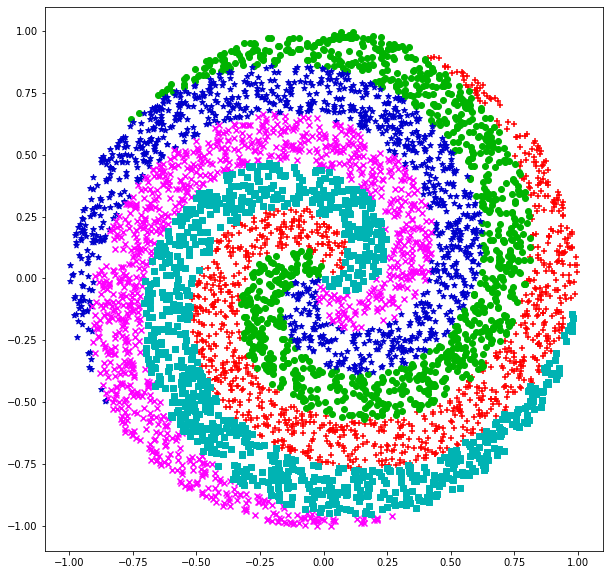

In [9]:
X,Y=create_data(5000,5,"spirals")
show_data(X,Y)

In [ ]:
print(X)
print(Y)

In [ ]:
idx=np.argmax(Y,axis=1)
idx

In [ ]:
Y[3,:]